In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from numpy import linspace, correlate, average
from IPython.display import Markdown
from analysis import *

In [2]:
Ttx = 23
Trx = 60
Tn = 100
Tw = 1000
pt.rcParams["figure.figsize"] = (20,10)

def genWindowHistogram(r1,r2,wnd,trx):
    windows = []
    pss = []
    
    for i in range(0,len(r1),wnd):
        count = 0
        try:
            
            Eb1,Es1,En1 = computeEvents(r1[i:i+wnd],Ttx,Trx,Tn)
            Eb2,Es2,En2 = computeEvents(r2[i:i+wnd],Ttx,Trx,Tn)
            Ps1 = Es1*Trx/(Eb1*Ttx+En1*Tn+Es1*Trx)
            Pb2 = Eb2*Ttx/(Eb2*Ttx+En2*Tn+Es2*Trx)
            pss.append(Ps1*Pb2)
        except:
            pass
        for j in range(i,i+wnd):
            
            try:
               
                if r1[j]=='S' and r2[j]=='B':
                    count += 1
            except:
                pass
        windows.append(count)
     
    result = [0 for i in range(wnd)]
    for n in range(len(result)):
        result[n] = windows.count(n)/len(windows)
    print('******************')
    print(average(pss))
    print('******************')
    return result



## Networking disabled

******************
0.0895660495759629
******************
Success probability evts: 0.089523
-----------------------------------------------------------
P0w= 0.910434;Hist[0]= 0.166544
PB2= 0.900054
PS1= 0.099512
PB*PS= 0.089566
rt1 = 39.132789 B/s
P(At least 1 beacon during Tw)= 0.833456
-----------------------------------------------------------
******************
0.15983238539534653
******************
Success probability evts: 0.160121
-----------------------------------------------------------
P0w= 0.840136;Hist[0]= 0.025388
PB2= 0.800029
PS1= 0.199823
PB*PS= 0.159864
rt1 = 34.783870 B/s
P(At least 1 beacon during Tw)= 0.974612
-----------------------------------------------------------
******************
0.21003893737258644
******************
Success probability evts: 0.210005
-----------------------------------------------------------
P0w= 0.789993;Hist[0]= 0.003721
PB2= 0.700115
PS1= 0.299961
PB*PS= 0.210007
rt1 = 30.439777 B/s
P(At least 1 beacon during Tw)= 0.996279
-----------

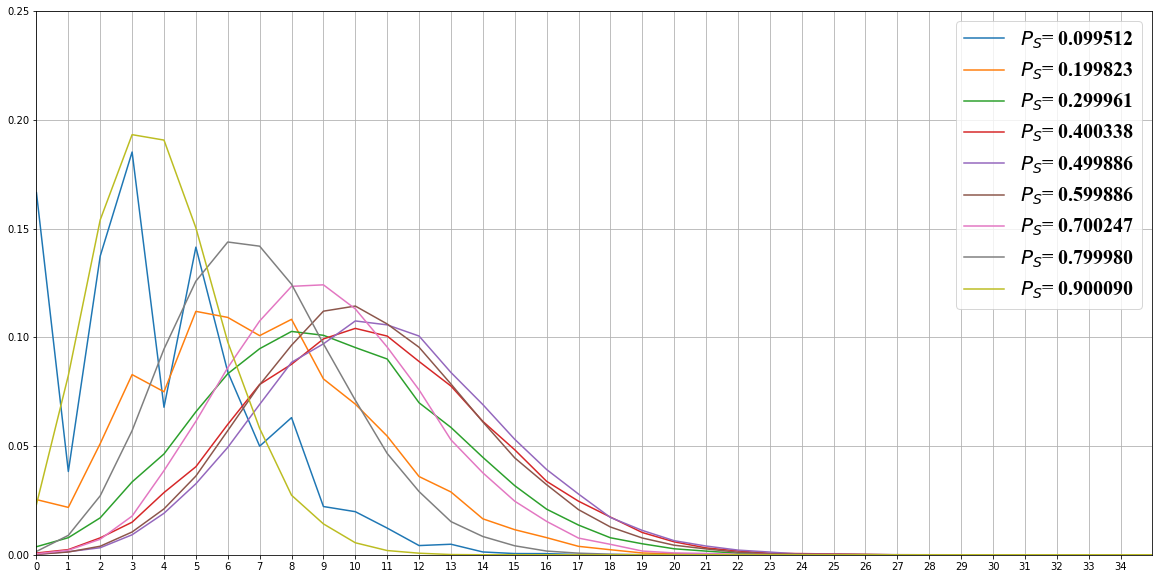

In [3]:
h1 = []
cmp = []
for i in range(1,10):
    f1 = open("r%d-d0-result.txt"%i)
    raw1 = f1.read()
    f1.close()

    f2 = open("r%d-d1-result.txt"%i)
    raw2 = f2.read()
    f2.close()
    
    Eb1,Es1,En1 = computeEvents(raw1,Ttx,Trx,Tn)
    Eb2,Es2,En2 = computeEvents(raw2,Ttx,Trx,Tn)
    
    wnds1 = genWindowHistogram(raw1,raw2,1000,Trx)
    Ps = checkSuccess(raw2,raw1)*Ttx/(Eb1*Ttx+En1*Tn+Es1*Trx)
    print("Success probability evts: %.6f"%(Ps))
    print('-----------------------------------------------------------')
    Ps1 = Es1*Trx/(Eb1*Ttx+En1*Tn+Es1*Trx)
    Pb2 = Eb2*Ttx/(Eb2*Ttx+En2*Tn+Es2*Trx)
    rt1 = Pb2/(Ttx/1000)
    P0w = Pb2*(1-Ps1)+Ps1*(1-Pb2)+(1-Ps1)*(1-Pb2)
    
    print("P0w= %.6f;Hist[0]= %.6f"%(P0w,wnds1[0]))
    h1.append(wnds1[0])
    cmp.append(P0w)
    print("PB2= %.6f"%(Pb2))
    print("PS1= %.6f"%(Ps1))
    print("PB*PS= %.6f"%(Pb2*Ps1))
    print("rt1 = %.6f B/s"%(rt1))
    print("P(At least 1 beacon during Tw)= %.6f"%(1-wnds1[0]))
    
    print('-----------------------------------------------------------')
    
    pt.plot(range(len(wnds1)),wnds1,label=r"$P_{S}$= %.6f"%(Trx*Es1/len(raw1)))

print(correlate(h1,cmp))
print('-----------------------------------------------------------')
pt.legend(prop={'family':'Times New Roman', 'size':20})
pt.axis([0,35,0,0.25])
pt.xticks(range(0,35,1), [str(n) for n in range(0,35,1)])
pt.grid(True)
pt.savefig('success_distribution_BS.pdf',dpi=300, bbox_inches='tight')
pt.show()

## Networking enabled

******************
0.08006784836890551
******************
Success probability evts: 0.079941
-----------------------------------------------------------
PB2= 0.799624
PS1= 0.100069
PB*PS= 0.080017
-----------------------------------------------------------
******************
0.13948706231239366
******************
Success probability evts: 0.139481
-----------------------------------------------------------
PB2= 0.699436
PS1= 0.199449
PB*PS= 0.139502
-----------------------------------------------------------
******************
0.17940335870715815
******************
Success probability evts: 0.179980
-----------------------------------------------------------
PB2= 0.600012
PS1= 0.299036
PB*PS= 0.179425
-----------------------------------------------------------
******************
0.20019007763602562
******************
Success probability evts: 0.199857
-----------------------------------------------------------
PB2= 0.499972
PS1= 0.400337
PB*PS= 0.200157
--------------------------------

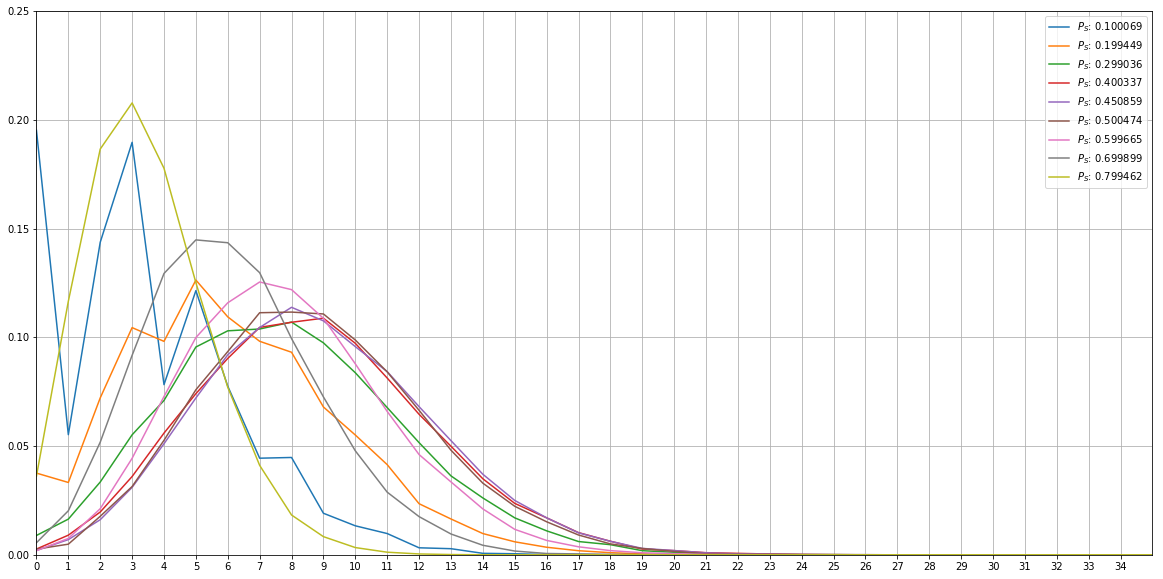

In [4]:
for i in range(1,10):
    
    f3 = open("r2%d-d0-result.txt"%i)
    raw3 = f3.read()
    f3.close()

    f4 = open("r2%d-d1-result.txt"%i)
    raw4 = f4.read()
    f4.close()
    
    Eb3,Es3,En3 = computeEvents(raw3,Ttx,Trx,Tn)
    Eb4,Es4,En4 = computeEvents(raw4,Ttx,Trx,Tn)
    wnds2 = genWindowHistogram(raw3,raw4,1000,Trx)
    Ps = checkSuccess(raw4,raw3)*Ttx/(Eb3*Ttx+En3*Tn+Es3*Trx)
    print("Success probability evts: %.6f"%(Ps))
    print('-----------------------------------------------------------')
    Ps1 = Es3*Trx/(Eb3*Ttx+En3*Tn+Es3*Trx)
    Pb2 = Eb4*Ttx/(Eb4*Ttx+En4*Tn+Es4*Trx)
    rt1 = Pb2/(Ttx/1000)
    print("PB2= %.6f"%(Pb2))
    print("PS1= %.6f"%(Ps1))
    print("PB*PS= %.6f"%(Pb2*Ps1))
    print('-----------------------------------------------------------')
    pt.plot(range(len(wnds2)),wnds2,label=r"$P_{S}$: %.6f"%(Trx*Es3/len(raw3)))

    
pt.legend()
pt.axis([0,35,0,0.25])
pt.xticks(range(0,35,1), [str(n) for n in range(0,35,1)])
pt.grid(True)
pt.savefig('success_distribution_BSN.pdf',dpi=300, bbox_inches='tight')
pt.show()

    Probability of failure

In [5]:
Pb = 0.8
Ps = 0.2
Tw = 1000
Tb = 23
Ts = 60
P0b = e**(-Pb*Tw/Tb)
P0s = e**(-Ps*Tw/Ts)
Pfail = Ps*(1-Pb) + Pb*(1-Ps) + (1-Pb)*(1-Ps)
print(P0b+P0s+P0b*P0s)
print(P0b)
print(P0s)
print(Pfail)

0.03567399334725321
7.836190355758275e-16
0.0356739933472524
0.8400000000000001
